### Importing the libraries

In [5]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as matplt
import seaborn as seaborn

### Loading the dataset

In [6]:
input = pandas.read_csv('adult.csv')
#print(input.head())
print(input.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 moving            32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null int64
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null object
 native-country    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB
None


In [7]:
input = input.replace(to_replace = ["?", " ?"], value = numpy.nan)

### Counting missing values

In [8]:
print (input.isnull().sum())

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 moving               0
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week     583
 native-country       0
dtype: int64


### Replacing missing values with mode for categorical data

In [9]:
input[' workclass'] = input[' workclass'].fillna(input[' workclass'].value_counts().index[0])
input[' occupation'] = input[' occupation'].fillna(input[' occupation'].value_counts().index[0])
input[' hours-per-week'] = input[' hours-per-week'].fillna(input[' hours-per-week'].value_counts().index[0])
#print(input[[' workclass', ' occupation', ' hours-per-week']].head(30))

In [10]:
print (input.isnull().sum())

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 moving            0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
dtype: int64


### Visualizing the dataset

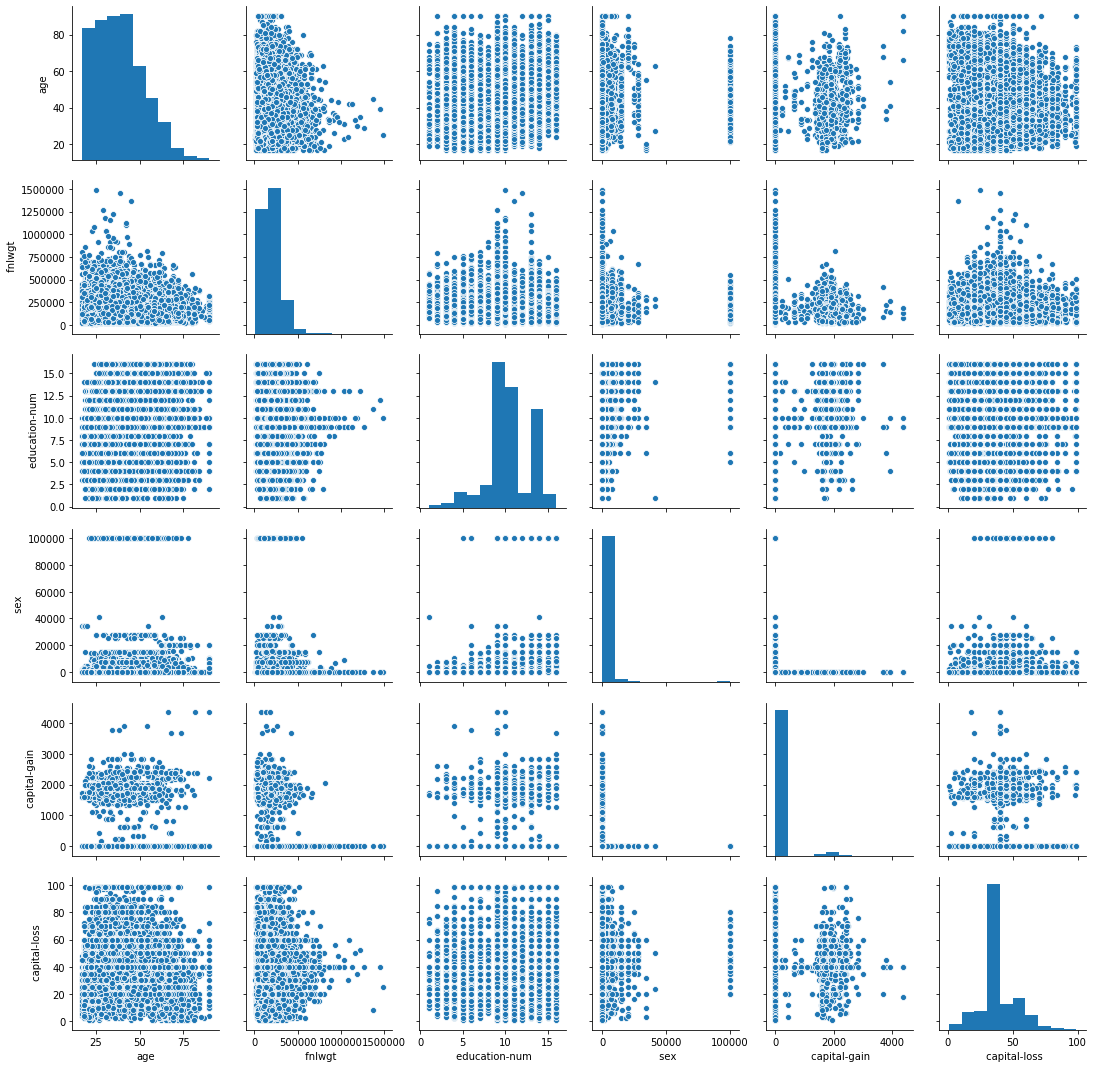

In [11]:
seaborn.pairplot(input)

### Converting String dataset to Integers

In [12]:
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()
input[' workclass'] = labelenc.fit_transform(input[' workclass'])
input[' education'] = labelenc.fit_transform(input[' education'])
input[' marital-status'] = labelenc.fit_transform(input[' marital-status'])
input[' occupation'] = labelenc.fit_transform(input[' occupation'])
input[' moving'] = labelenc.fit_transform(input[' moving'])
input[' relationship'] = labelenc.fit_transform(input[' relationship'])
input[' race'] = labelenc.fit_transform(input[' race'])
input[' hours-per-week'] = labelenc.fit_transform(input[' hours-per-week'])
#print(input[' workclass'])

### Separating Feature and Target variables

In [13]:
X = input.drop(' native-country', axis = "columns")
Y = input[' native-country']
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age                32561 non-null int64
 workclass         32561 non-null int32
 fnlwgt            32561 non-null int64
 education         32561 non-null int32
 education-num     32561 non-null int64
 marital-status    32561 non-null int32
 occupation        32561 non-null int32
 moving            32561 non-null int32
 relationship      32561 non-null int32
 race              32561 non-null int32
 sex               32561 non-null int64
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB
None


### Splitting the dataset into Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# GaussianNB - Modelling the classifier

In [15]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train,Y_train)
y_pred_gnb = modelGNB.predict(X_test)

### Computing Accuracy for GaussianNB

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print (classification_report(Y_test, y_pred_gnb))
print ("Accuracy score : {}".format(accuracy_score(Y_test, y_pred_gnb)))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      6159
        >50K       0.67      0.31      0.43      1982

    accuracy                           0.79      8141
   macro avg       0.74      0.63      0.65      8141
weighted avg       0.78      0.79      0.77      8141

Accuracy score : 0.7947426606068051


### Computing Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_gnb)

array([[5849,  310],
       [1361,  621]], dtype=int64)

### Visualising the Training set results

# MultinomialNB - Modelling the classifier

In [18]:
from sklearn.naive_bayes import MultinomialNB
modelMNB = MultinomialNB()
modelMNB.fit(X_train,Y_train)
y_pred_mnb = modelMNB.predict(X_test)

### Computing Accuracy for MultinomialNB

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print (classification_report(Y_test, y_pred_mnb))
print ("Accuracy score : {}".format(accuracy_score(Y_test, y_pred_mnb)))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87      6159
        >50K       0.63      0.23      0.34      1982

    accuracy                           0.78      8141
   macro avg       0.71      0.59      0.60      8141
weighted avg       0.76      0.78      0.74      8141

Accuracy score : 0.7804937968308562


### Computing Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_mnb)

array([[5895,  264],
       [1523,  459]], dtype=int64)

### Visualising the Training set results

In [28]:
h = 0.02
x_min, x_max = X_train.iloc[:,0].min() - 10*h, X_train.iloc[:,0].max() + 10*h
y_min, y_max = X_train.iloc[:,1].min() - 10*h, X_train.iloc[:,1].max() + 10*h

xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                         numpy.arange(y_min, y_max, h))
Z = modelMNB.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

matplt.figure(figsize=(5,5))
matplt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
matplt.contour(xx, yy, Z, colors='k', linewidths=0.7)
matplt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=Y, cmap=cmap, edgecolors='k');

ValueError: shapes (1357900,2) and (14,2) not aligned: 2 (dim 1) != 14 (dim 0)

In [48]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = numpy.meshgrid(numpy.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     numpy.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
print(numpy.size(X1, 1))
print(numpy.size(X1, 0))
print(numpy.size(X2, 1))
print(numpy.size(X2, 0))
print(X1.ravel())
print(X2.ravel())
print((numpy.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape))
#matplt.contourf(X1, X2, modelGNB.predict(numpy.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#matplt.xlim(X1.min(), X1.max())
#matplt.ylim(X2.min(), X2.max())
#for i, j in enumerate(numpy.unique(y_set)):
#    matplt.scatter(X_set.iloc[y_set == j, 0], X_set.iloc[y_set == j, 1],
#                c = ListedColormap(('red', 'green'))(i), label = j)
#matplt.title('Naive Bayes (Training set)')
#matplt.xlabel('Age')
#matplt.ylabel('Estimated Salary')
#matplt.legend()
#matplt.show()

7500
900
7500
900
[16.   16.01 16.02 ... 90.97 90.98 90.99]
[-1.   -1.   -1.   ...  7.99  7.99  7.99]


ValueError: cannot reshape array of size 13500000 into shape (900,7500)